In [38]:
import sys
import cv2
import numpy as np
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from datetime import datetime
import matplotlib.pyplot as plt


In [46]:
startTime = datetime.now()


img = cv2.imread('image_3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(
    "uint8"
)

In [47]:
# apply gamma correction using the lookup table
gray = cv2.LUT(gray, table)

ret, thresh1 = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[
    -2:
]

In [48]:
def biggestRectangle(contours):
    biggest = None
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
        i = contours[index]
        area = cv2.contourArea(i)
        if area > 100:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.1 * peri, True)
            if area > max_area:  # and len(approx)==4:
                biggest = approx
                max_area = area
                indexReturn = index
    return indexReturn

In [49]:
indexReturn = biggestRectangle(contours)
hull = cv2.convexHull(contours[indexReturn])

In [50]:
# create a crop mask
mask = np.zeros_like(img)  # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, indexReturn, 255, -1)  # Draw filled contour in mask
out = np.zeros_like(img)  # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

In [51]:
# crop the image
(y, x, _) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = img[topy : bottomy + 1, topx : bottomx + 1, :]


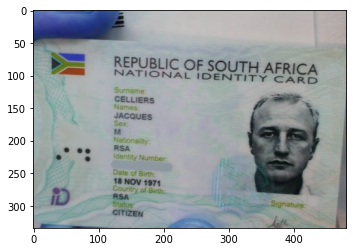

In [52]:
plt.imshow(out)